# Second Assignment: Exercise and a Personal Project

In this second and final assignment you have the opportunity to choose a dataset and perform data analysis to answer the type of questions that interest you or will utilise a technique that you want to gain experience in. 

You may wish to select a dataset that we have already looked at (e.g. Titanic, or IMDB), or select another open-source dataset from Kaggle (or other). Once you've selected a dataset to investigate, proceed to complete the template cells below. In the markdown cells, you should provide a brief introduction to the dataset, and write the questions that you will investigate. Then use the code cells to answer the questions you select.

### Logistics

**Deadline.** Please see the Assessment deadline in specified in Canvas. Late submissions will not be accepted. This notebook is the Second of two Assignments for this course.

**The Assignment Task.** This Second Assignment portfolio will account for the remaining 70 points of the 100 (Assignment 1 was worth 30 marks). This Second Assignment features two parts: 
* Part 1 is out of 20 marks, based on a defined set of problems. This will extend your application of numpy, pandas, and matplotlib on the iris dataset. 
* Part 2 is out of 50 marks, and requires you to perform exploratory data analysis on a dataset of your choice. You should start by selecting a dataset and acquiring the data. Describe the context of the dataset with commentary and descriptive statistics. Then you should choose three questions to ask of the dataset and then outline how to answer them. Where appropriate, seek to display the results with an appropriate plot.

**Submission.** Please email your solutions and your completed Declaration of Authorship (DoA) form to weeklyclasses@conted.ox.ac.uk 

# Part 1 (Set Exercise) (out of 20 marks)

In this first part of Assignment 2, you are asked to continue work on the Iris dataset and further utilise libraries such as NumPy, Pandas and Matplotlib.

### Set up cells

In [44]:
## Installing the python libraries (put this in a separate cell in jupyter notebook)
#pip install numpy 
#pip install pandas 
#pip install matplotlib 
## Let's import the libraries we are going to use later on
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.patches import PathPatch
import matplotlib.patches as mpatches 
import seaborn as sns

# Let's set the precision for NumPy and Pandas
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:,.2f}'.format

### Import iris dataset 

In [5]:
# Input:
# Import iris keeping the text column intact
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', 
                     names=['sepal length', 'sepal width', 'petal length', 'petal width', 'species'],
                     dtype=[np.float32, np.float32, np.float32, np.float32, '|S15']
)
iris_df = pd.DataFrame(iris) #I am converting the iris dataset into a pandas dataframe

### 1A. Produce some descriptive statistics for the iris dataset (5 marks)

For example, display the count of records, mean, std, min, max and in addtion to the quartiles for each of the columns.

#### Creating the summary statistic table

I have used the `describe()` function to create the summary statistic table.

In [6]:
# Write your solution here.
#print(pd.DataFrame(iris))
pd.DataFrame(iris).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


#### Additional Exploration: Creating a summary statistic table grouped by species

I decided to explore further and create a summary statistic table that is grouped by each `species` in the `iris` dataset. I was curious to see how the summary statistic table would look like if I grouped it by each species. I noticed that creating this table helped me answer **question 1.B**

In [7]:
# I decided to create a class called quantiles because I was creating functions for the 25th and 75th percentile. I thought that this would be good practice just incase I wanted to add more quntiles in my summary statistic
class quantiles: 
    def quantile_25(self,x): 
        return x.quantile(0.25) 
    
    def quantile_75(self,x):
        return x.quantile(0.75) 

#I am creating my summary statisitc by using the `groupby()`function
#`agg()` is a aggregate function and is used to generate the summary statistics
#I use the `transpose()` function to display the summary statistic table vertically so it can be easier to read
#I use the `rename()` function to rename some of the default index names that were set during the `agg()` function
pd.DataFrame(iris).groupby('species').agg(['count','mean','std',
                                           'min',quantiles().quantile_25,'quantile',quantiles().quantile_75,'max']
                                         ).transpose().rename(index={'quantile_25': '25%','quantile': '50%','quantile_75': '75%'})


species             b'Iris-setosa'  b'Iris-versicolor'  b'Iris-virginica'
sepal_length count           50.00               50.00              50.00
             mean             5.01                5.94               6.59
             std              0.35                0.52               0.64
             min              4.30                4.90               4.90
             25%              4.80                5.60               6.22
             50%              5.00                5.90               6.50
             75%              5.20                6.30               6.90
             max              5.80                7.00               7.90
sepal_width  count           50.00               50.00              50.00
             mean             3.42                2.77               2.97
             std              0.38                0.31               0.32
             min              2.30                2.00               2.20
             25%              3.12                2.52               2.80
             50%              3.40                2.80               3.00
             75%              3.68                3.00               3.18
             max              4.40                3.40               3.80
petal_length count           50.00               50.00              50.00
             mean             1.46                4.26               5.55
             std              0.17                0.47               0.55
             min              1.00                3.00               4.50
             25%              1.40                4.00               5.10
             50%              1.50                4.35               5.55
             75%              1.58                4.60               5.88
             max              1.90                5.10               6.90
petal_width  count           50.00               50.00              50.00
             mean             0.24                1.33               2.03
             std              0.11                0.20               0.27
             min              0.10                1.00               1.40
             25%              0.20                1.20               1.80
             50%              0.20                1.30               2.00
             75%              0.30                1.50               2.30
             max              0.60                1.80               2.50

### 1B. Calculate the maximum petal width for each species of flower (5 marks)

#### Approach one: using a summary statistic table
Using the code from the previous problem I decided to make my summary statistic table,which was grouped by each species, shorter. I did this by only specifying the `petal_width` column and then only calculating the maximum `petal_width` for each species through the `agg()` function. 

In [8]:
#Write your solution here
pd.DataFrame(iris)[['petal_width','species']].groupby('species').agg(['max']).transpose()

,species,b'Iris-setosa',b'Iris-versicolor',b'Iris-virginica'
petal_width,max,0.60,1.80,2.50


#### Approach two (straightforward version): Generating the max `petal_width` through the `groupby()` function

An alternative way to list out the maximum `petal_width` if to use the `groupby()` and `max()` functions. This method is similar to my first approach although this second approach is more straight forward.

In [9]:
iris_df.groupby('species').max()['petal_width']

species
b'Iris-setosa'       0.60
b'Iris-versicolor'   1.80
b'Iris-virginica'    2.50
Name: petal_width, dtype: float32

### 1C. Data Visualisation (5 marks)

Produce a boxplot for each of the four columns of the iris dataset (sepal_length, sepal_width, petal_length and petal_width) in addition to the volume column (if you completed Assignment 1).

#### Creating the volume column, changing the flower species names, and re-naming some columns

I am creating the volume column and will be replacing the old/default species name with new names that will make the graph legends look neat. I am also re-naming the `sepal_length, sepal_width, petal_length, petal_width` columns because I want to remove the underscore in the names (this step is not necessary but I want to make this change so the labels in the graph look nice)

* **Note**: While I am making some big changes to the iris dataset I would like to point out that the dataframe that is being edited is `iris_df` which is an alternative dataframe that I made to make these additional edits and to not mess up the original dataset.

In [10]:
#making the volume column
iris_df['Volume'] = (math.pi * iris_df['sepal_length']**2 * iris_df['petal_length'])/3

#I am also replacing the values under the `species` column in the iris_df dataframe just to display the species name neatly
iris_df = iris_df.replace({b'Iris-setosa': 'Setosa',b'Iris-versicolor': 'Versicolor',b'Iris-virginica': 'Virginica'})

#re-naming the `sepal_length, sepal_width, petal_length, petal_width` columns
iris_df.rename(columns= {'sepal_length' : 'Sepal Length',
                         'sepal_width' : 'Sepal Width',
                         'petal_length' : 'Petal Length',
                        'petal_width' : 'Petal Width'},  inplace=True)
iris_df

,Sepal Length,Sepal Width,Petal Length,Petal Width,species,Volume
0,5.10,3.50,1.40,0.20,Setosa,38.13
1,4.90,3.00,1.40,0.20,Setosa,35.20
2,4.70,3.20,1.30,0.20,Setosa,30.07
3,4.60,3.10,1.50,0.20,Setosa,33.24
4,5.00,3.60,1.40,0.20,Setosa,36.65
...,...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,Virginica,244.45
146,6.30,2.50,5.00,1.90,Virginica,207.82
147,6.50,3.00,5.20,2.00,Virginica,230.07
148,6.20,3.40,5.40,2.30,Virginica,217.37


#### Creating the boxplot using `seaborn`

`seaborn` is a python visualisation library based on `matplotlib`. I am using it to create the boxplots for the `iris_df` dataframe. I am using `seaborn` since it is a popular python library used for data visualisation and to create graphs. 

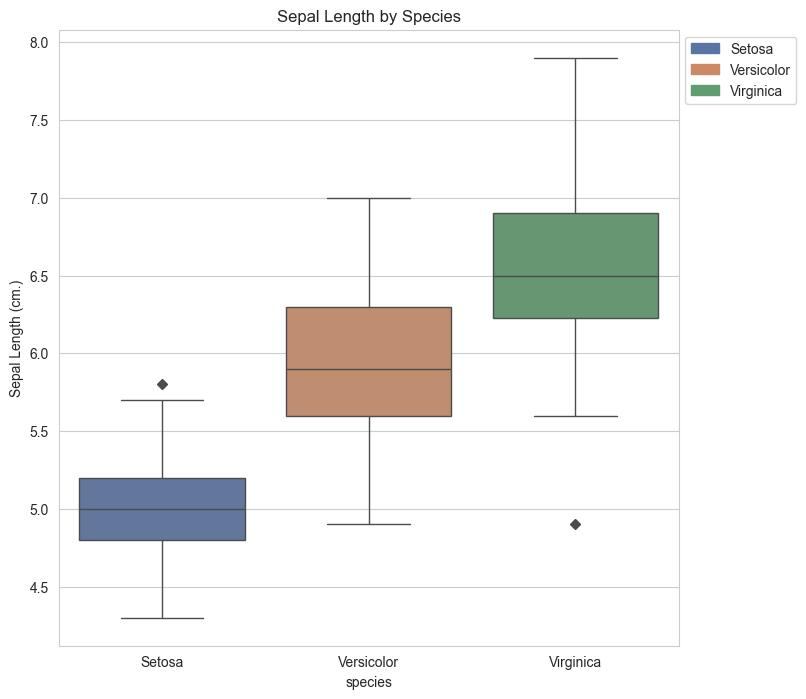

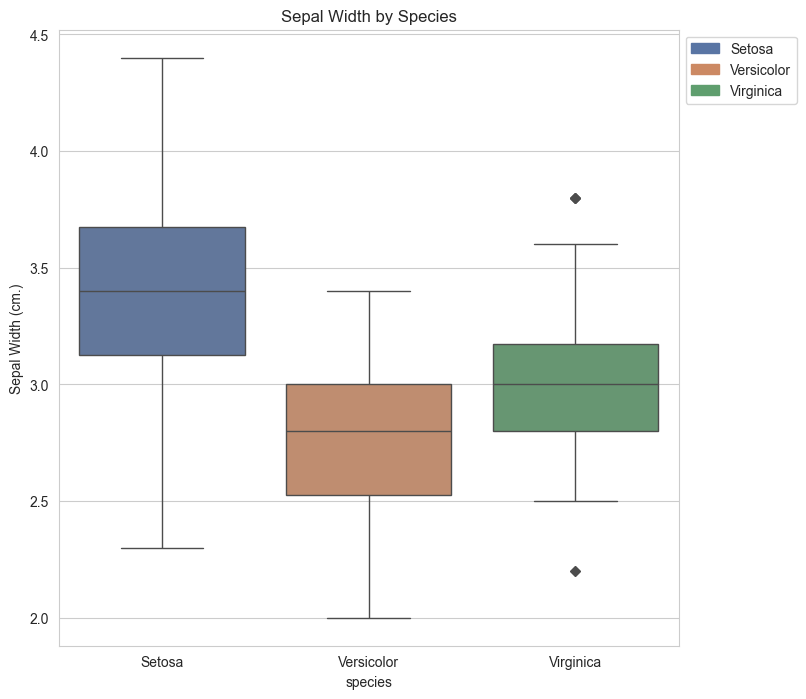

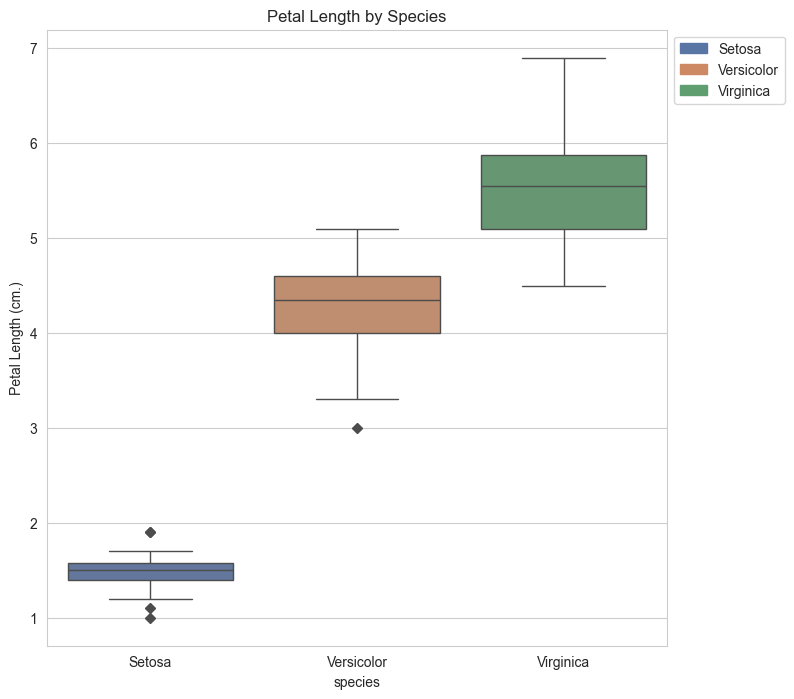

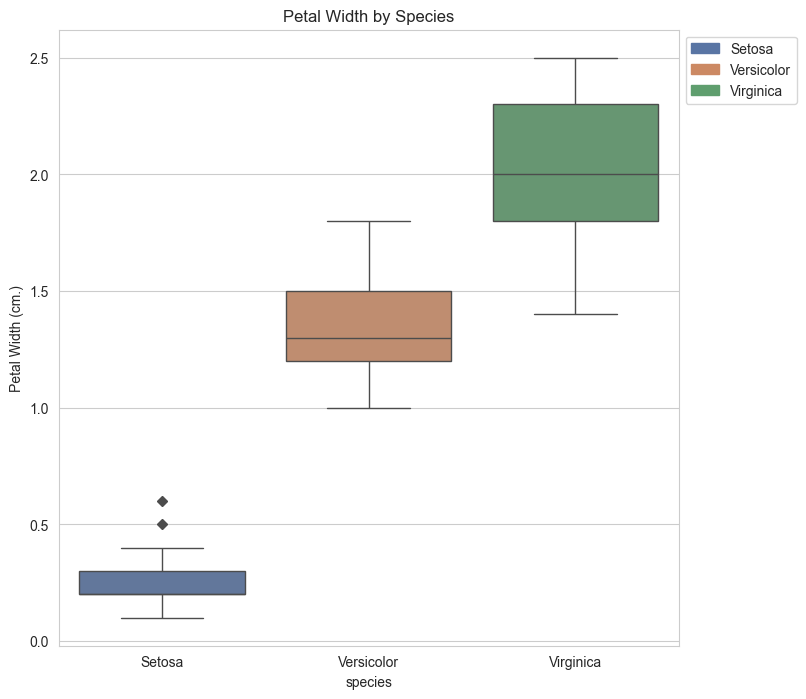

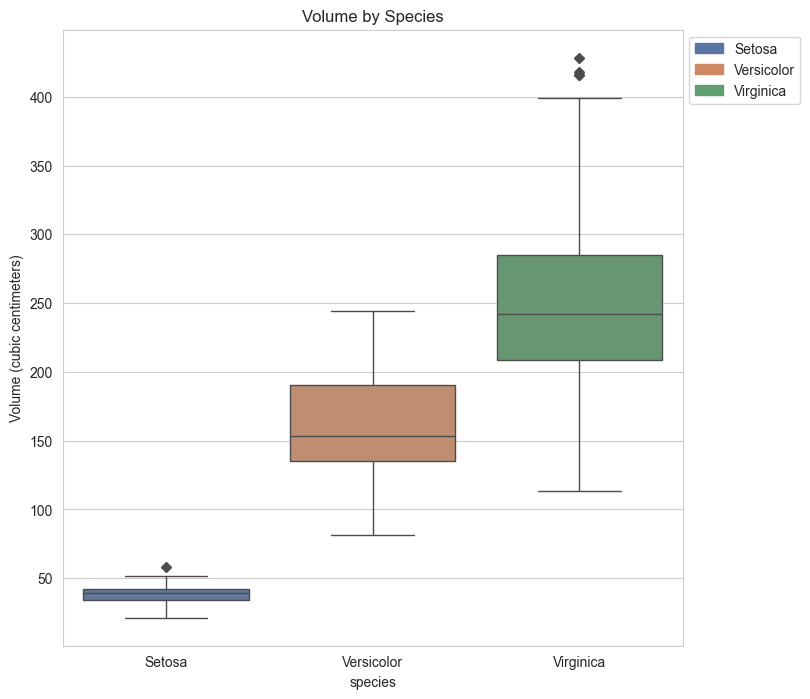

In [13]:
my_pal = {'Setosa': "#5975a4", 'Versicolor': "#cc8963" , 'Virginica' :"#5f9e6e"} #This is the color palette that I am defining to color in the boxes in the boxplot

#I am using this for loop to go through the list each column in the `iris_df` dataframe
for x in list(iris_df.columns):
    y_axis_val = iris_df[x] #I am creating the `y_axis_val` variable to store the y values of the chart
    
    ###this if statement goes through all the numeric columns and leaves out the `species` column since the graph is got going to display the flower species as a numeric value
    if x != 'species':
        plt.figure(figsize=(8,8))#defining the figure size of the graph
        sns.set_style("whitegrid")#defining the background of the graph to be single-lined and horizontal

        if x == 'Sepal Length' or x == 'Sepal Width' or x == 'Petal Length' or x == 'Petal Width':
            sns.boxplot(x=iris_df["species"], #the x-axis will only include the species
                        y=y_axis_val, 
                        hue=iris_df["species"], #`hue` is used to visualise the data of different categories into one graph
                        palette=my_pal, # I am defining the colors of each boxplot
                       flierprops={"marker": "D",'markersize': 5, 'markerfacecolor': '#4c4c4c'} #I am defining the markers color and size
                       ).set(title= (x +' by Species'), ylabel = (x + ' (cm.)')) #I am setting the title for each graph and the y-axis label
        
        elif x == 'Volume': #I am creating a separate boxplot for the volume column so I can edit the y-axis unit label
                    sns.boxplot(x=iris_df["species"], #the x-axis will only include the species
                        y=y_axis_val, 
                        hue=iris_df["species"], #`hue` is used to visualise the data of different categories into one graph
                        palette=my_pal, # I am defining the colors of each boxplot
                       flierprops={"marker": "D",'markersize': 5, 'markerfacecolor': '#4c4c4c'} #I am defining the markers color and size
                       ).set(title= (x +' by Species'), ylabel = (x + ' (cubic centimeters)')) #I am setting the title for each graph and the y-axis label

        ### manually creating the color legend labels and colors
        setosa_color_legend = mpatches.Patch(color='#5975a4', label='Setosa')
        versicolor_color_legend = mpatches.Patch(color='#cc8963', label='Versicolor')
        virginica_color_legend = mpatches.Patch(color='#5f9e6e', label='Virginica')

        ### creating the color legend and defining its position
        plt.legend(handles = [setosa_color_legend, versicolor_color_legend, virginica_color_legend], # the handles create the legend 
                   bbox_to_anchor=(1, 1), loc='upper left') #I am defining the legend position


plt.show()

### 1D. Provide a short intrepretation of the data visualised by your 1C solution. (5 marks)


Based on my observations and analysis of the boxplots, I believe that the **Iris-Virginica** flower species is a large flower since it has the largest sepal length, petal length, petal width, and volume as compared to the other flower species. 

**Iris-Setosa** is the smallest flower species and **Iris-Versicolor** is the flower species that falls in the middle when compared with the other two species. I reached my conclusion based on my observations of each graph which I have desribed below:

#### Sepal Length Observations

*   **Iris-Setosa** has the **smallest median sepal length of 5 cm.**. There is one outlier which is close to 6 cm. but that is not representative of the whole sample.
*   **Iris-Versicolor** has a **sepal length median that is below 6 cm.**. Although the median sepal length of Iris-Versicolor is not too big, I did notice that there was a **right-skew** in the boxplot which might suggest that most of the sepal length values of Iris-Versicolor are small but there were some large values that skewed the distribution
*    **Iris-Virginica** has a **sepal length median of 6.5 cm.** which is the largest medain as compared to the other flower species. This boxplot also has a **right-skew** distribution which might imply that most of the sepal length values were small, but there were some large values in the distribution.

#### Sepal Width Observations

*   **Iris-Setosa** has the **highest median sepal width that is close to 3.5 cm.**. There appears to be a equal/normal distribution which means that the values close to the mean occur frequently as opposed to values that are farther from the mean.
*   **Iris-Versicolor** has the **lowest median sepal width that is just below 3 cm.**. There appears to be a **left-skew** which mean the median is greater than the mean and implies that most of the sepal width values are big with some small values skewing the distribution. 
*    **Iris-Virginica** has a **sepal width median of 3 cm.** which falls in the middle of Iris-Setosa and Iris-Versicolor. The distribution of the boxplot appears to be normal with two outliers (one large and one small)

#### Petal Length Observations

*   **Iris-Setosa** has the **smallest median petal length which is around 1.5 cm.**. There are 3 outliers in this boxplot which shows that there are not many Iris-Setosa flowers that have large petal lengths.
*   **Iris-Versicolor** has the **a petal length that is above 4 cm.**. This length falls in the middle when compared to the two species but it is still significantly bigger than the petal length of Iris-Setosa.
*   **Iris-Virginica** has the **largest petal length that is around 5.5 cm.**. 

#### Petal Width Observations

*   **Iris-Setosa** has the **smallest median petal width which is around 0.25 cm.**. The median line is not visible in the boxplot which indicates skewness in the data
*   **Iris-Versicolor** has a **median petal width that is around 1.25 cm.**. The boxplot appears to have a right skew
*   **Iris-Virginica** has the **largest median petal width of 2 cm.**

#### Volume Observations
*   **Iris-Setosa** has the **smallest median volume which is below 50 cubic centimeters**. The median volume is extremly low as compared to Iris-Versicolor and Iris-Virginica which indicates that the Iris-Setosa is really light in weight
*   **Iris-Versicolor** has a **median volume that is slightly above 150 cubic centimeters**. The boxplot indicated a right/positive skew in the data
*   **Iris-Virginica** has the **largest median volume that is slightly below 250 cubic centimeters**. This means that the flower is the heaviest out of all the species

# Part 2 - Personal Project (out of 50 marks)
In this second part of Assignment 2 you have the opportunity to perform some data analysis on a dataset of your choice. Choose a dataset or a scenario that interests you and provide an outline of the scenario, clean the dataset (if needed), perform some statistic analysis, visualise this data analysis and comment on what you see.   

## [Provide a brief introduction to your dataset here] (5 marks)

For this assignment, I will be analysing the mpg dataset which contains information about 38 new car models which have been released every year from 1999 and 2008.

I have definded the dataset columns below:

*   **mpg**: mpg means miles per gallon and it is the distance of each car measured in miles. It is referred to the *fuel economy* of a car since it represents the amount travelled by the car and the amount of fuel consumed. A *higher* mpg is better since it shows that your car can consume less fuel as you drive.
*   **cylinders**: A car cylinder is a important part of the engine. This is where fuel is consumed and the car's energy is generated. If a car has *more* cylinders that means the cars power can be generated *faster*. However, there is a tradeoff to this since you need more fuel to generate more power. So if your care has more cylinders then you will end up paying for more fuel.
*    **displacement**: A cars displacement refers to the amount of air that can be pushed into the cylinders. The higher the engine displacement the more power the engine can generate.
*    **horsepower**: The cars horsepower is a measurment of how fast a cars engine can work. The more horsepower a car has the faster it can go
*    **weight**: Car weight. The heavier a car, the more fuel it requires
*    **acceleration**: Acceleration describes the rate at which the car can increase its speed. Having a high car acceleration will use more fuel
*    **model_year**: Gives the year the car was made/manufactured
*    **origin**: Where the car was manufactured
*    **name**: The car model

In [ ]:
#installing the mpg python data package which contains information about fuel economy from 1999 and 2008 for 38 popular models of cars
#pip install mpg

In [118]:
# Add setup code here - set the path to the chosen dataset, and import the relevant Python libraries.
mpg = sns.load_dataset("mpg") #loading the dataset 
mpg[0:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.00,8,307.00,130.00,3504,12.00,70,usa,chevrolet chevelle malibu
1,15.00,8,350.00,165.00,3693,11.50,70,usa,buick skylark 320
2,18.00,8,318.00,150.00,3436,11.00,70,usa,plymouth satellite
3,16.00,8,304.00,150.00,3433,12.00,70,usa,amc rebel sst
4,17.00,8,302.00,140.00,3449,10.50,70,usa,ford torino


In [22]:
# Load in your data and display some descriptive statistics and commentary to provide a summary of the dataset.
mpg.describe() #creating the summary statistic for the data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,392.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,"2,970.42",15.57,76.01
std,7.82,1.70,104.27,38.49,846.84,2.76,3.70
min,9.00,3.00,68.00,46.00,"1,613.00",8.00,70.00
25%,17.50,4.00,104.25,75.00,"2,223.75",13.83,73.00
50%,23.00,4.00,148.50,93.50,"2,803.50",15.50,76.00
75%,29.00,8.00,262.00,126.00,"3,608.00",17.18,79.00
max,46.60,8.00,455.00,230.00,"5,140.00",24.80,82.00


## 1. [Choose and write a question here] (15 marks)
### (e.g. What percentage of male and female passengers perished?)


# Question 1: Is there a realtionship between car origins and the mpg of each car?

I am curious to see if there is a relationship between the origin of where a car is manufactured and how many miles per gallon (mpg) can it ride. Do some countries produce less powerful cars as compared the overall average? To answer this question I am going to create a box plot which displays the median mpgs of cars produced by each country in the mpg dataset.

#### Answer
There does seem to be some relationship between the origin of a car and the mpg (miles per gallon) that it can run. In the boxplot that I produced below I noticed the the USA has the lowest median of car mpg's which is below 20 mpg (this number is below the average car mpg which is around 25). Japan and Europe manufacture and release cars with mpg's higher than the average (Japan has a median car mpg of around 32 while Europe has a median car mpg of around 27).

While my dataset only contained the data of 3 countries it was interesting to see that some contries produce cars that are a bit inefficient and are not in line with the main manufacturing/production market. I am now curious to find out if there are specific cities in which these cars are being produced. Does the specific manufacturing location of cars correlate with a low (or high) mpg rate or overall car build?

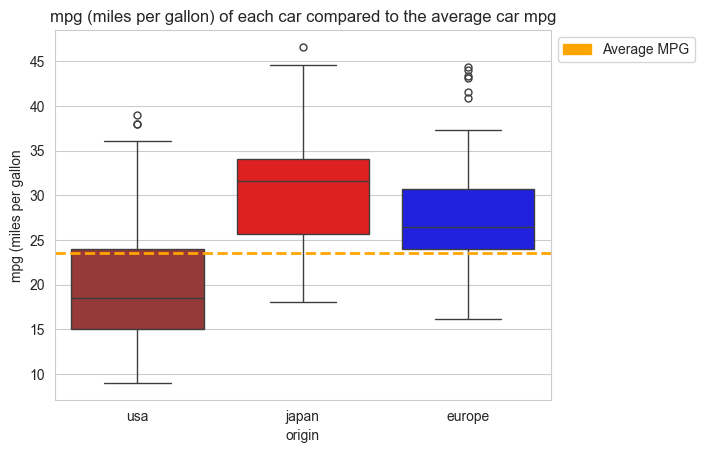

In [46]:
# Add code here to answer this question


sns.boxplot(x=mpg["origin"], #the x-axis will only include the species
            y=mpg['mpg'], 
            hue=mpg["origin"], #`hue` is used to visualise the data of different categories into one graph
            palette={'usa': "brown", 'japan': "red" , 'europe' :"blue"}, # I am defining the colors of each boxplot
           flierprops={"marker": "o",'markersize': 5} #I am defining the markers color and size
           ).set(title= ('mpg (miles per gallon) of each car compared to the average car mpg'), ylabel = ('mpg (miles per gallon')
                ) 

plt.axhline(mpg.mpg.mean(),color='orange',linestyle='dashed',linewidth=2)
plt.legend(handles = [mpatches.Patch(color='orange', label='Average MPG')], # the handles create the legend 
           bbox_to_anchor=(1, 1), loc='upper left') #I am defining the legend position

## 2. Has the distribution of car mpgs increased or decreased throughout the years?  

Following the last question, I am curious to see if the car mpgs can increased as they were distributed througout the years. I assume that the answer will be yes but I am curious to see if this growth was fast or slow. I am going to use a line chart for this visualisation. 

#### Answer and observation
Based on the line graph that I have made my initial hypothesis was correct. The distribution of car mps's has increased through the years. I noticed that in the years 1979 and 1980 the care mpg distribution increased drastically but then fell during the following year. One question that I would like to investigate further is why did the car mpg rate drop during that year. In fact, what led to the mpg rate drop for the other years (ex. 1971-1973, 1974-1975)

#### Line graph by each country
I also decided to go one step further with my line graph and see how the care distribution mpg rates compare for each country. The second line graph perfectly explained the observations that I made during the first question where I analysed the boxplot. The USA has always had the lowest car mpg distribution rates and they were only able to reach the global average in 1979. So it took the USA **9 years** to catch up with Japan and Europe. Even then, Japan and Europe were ahead of the USA by 10 mpg units.

Europe and Japan have has similar mpg distribution rates throughout the years. This means that both countries are leaders in the car manufacturing industry (although this might be big thing to say without taking other countries into account. I noticed that both Japan and Europe has a big mpg crash between 1971 and 1973. I wonder what happended during that time where both countries could not release a car model that had a higher mpg that the previous models. 

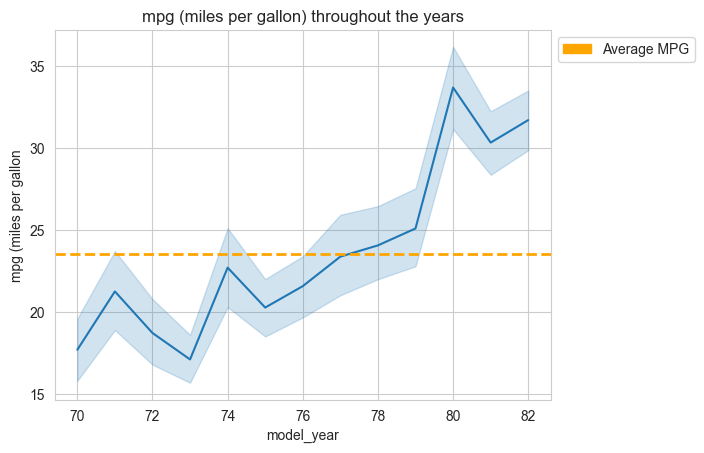

In [49]:
# Add code here to answer this question
sns.lineplot(x=mpg["model_year"], #the x-axis will only include the species
            y=mpg['mpg'], 
            #hue=mpg["origin"], #`hue` is used to visualise the data of different categories into one graph
            #palette={'usa': "brown", 'japan': "red" , 'europe' :"blue"}, # I am defining the colors of each boxplot
           #flierprops={"marker": "o",'markersize': 5} #I am defining the markers color and size
           ).set(title= ('mpg (miles per gallon) throughout the years'), ylabel = ('mpg (miles per gallon')
                ) 

plt.axhline(mpg.mpg.mean(),color='orange',linestyle='dashed',linewidth=2)
plt.legend(handles = [mpatches.Patch(color='orange', label='Average MPG')], # the handles create the legend 
           bbox_to_anchor=(1, 1), loc='upper left') #I am defining the legend position

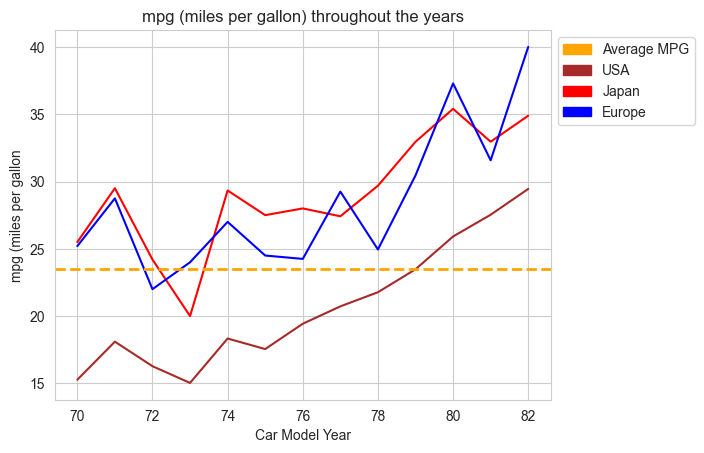

In [59]:
sns.lineplot(x=mpg["model_year"], #the x-axis will only include the species
            y=mpg['mpg'], 
            hue=mpg["origin"], #`hue` is used to visualise the data of different categories into one graph
              errorbar=None, #removing the confidence interval shadow that is surrounded by each line
            palette={'usa': "brown", 'japan': "red" , 'europe' :"blue"}, # I am defining the colors of each line
           ).set(title= ('mpg (miles per gallon) throughout the years'), ylabel = ('mpg (miles per gallon'), xlabel = ('Car Model Year')
               ) 

plt.axhline(mpg.mpg.mean(),color='orange',linestyle='dashed',linewidth=2)
plt.legend(handles = [mpatches.Patch(color='orange', label='Average MPG'),
                     mpatches.Patch(color='brown', label='USA'),
                     mpatches.Patch(color='red', label='Japan'),
                     mpatches.Patch(color='blue', label='Europe')], # the handles create the legend 
           bbox_to_anchor=(1, 1), loc='upper left') #I am defining the legend position

## 3. Is there a relationship between the car mpg distribution and car companies?  (15 marks)

I want to see if there is a trend with car companies and the mpg distributions that they release. Are a small number of car companies producing cars that have a mpg above the average or are most car companies doing this?

To start, I am first going to create a new column called `company_name`. I am going to create this column by spliting the first names of the car models into the  `company_name` column (I am splitting the first name because most cars always start their car model name with the company name). After looking at the different car companies I realised that there are some companies that are worded differently or have abbreviations. My next goal is to make the naming of all companies consistent and to remove any repetitons through the `replace()` function.

#### My Answer and Observations
After plotting the box plots I realised that out of the 27 companies that I displayed, only **10 of the companies** were able to manufacture care that were above the average mpg rate. I was suprised to see this since I expected at least half of the car companies to be above the average threshold. I am curious to see how much impact these 10 companies played in bringing up the average car mpg rate (the highs in the line graph). But I believe that would require some advanced statisitcs so I will leave that question for another day. 

I have also included three additional boxplots where I compare the individual car companies from each country to the mpg (miles per gallon) level and the all the USA car companies were below the average mpg level meaning that U.S companies are behind in creating fuel effeicient cars. If you would want to buy a efficient car then it would be best to buy a car from a Japenese or European car company. 

In [125]:
# Add code here to answer this question
mpg['name_copy'] = mpg['name'].copy() #I am creating a copy of the 'name' column
mpg['company_name'] = mpg['name_copy'].str.split(' ', expand=True)[0] #I am spliting the car model names and am only keepin the column that contain the car company names
print('This is the aproximate number of car companies in this dataset:',len(mpg['company_name'].unique())) #output: 37 -there are roughly 37 different car companies represented in this dataset
print('------------------------------------')
print(mpg['company_name'].unique()) #I am printing out all the car companies names to get a feel of the data. I need to make the naming consistent for some companies

mpg['company_name'] = mpg['company_name'].replace(['volkswagen','vokswagen','vw'],'VW') #making the volkswagen naming consistent
mpg['company_name'] = mpg['company_name'].replace('maxda','mazda') #making the mazda naming consistent
mpg['company_name'] = mpg['company_name'].replace('toyouta','toyota')
mpg['company_name'] = mpg['company_name'].replace('mercedes','mercedes-benz')
mpg['company_name'] = mpg['company_name'].replace('nissan','datsun')
mpg['company_name'] = mpg['company_name'].replace('capri','ford')
mpg['company_name'] = mpg['company_name'].replace(['chevroelt','chevy'],'chevrolet')

This is the aproximate number of car companies in this dataset: 37
------------------------------------
['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan']


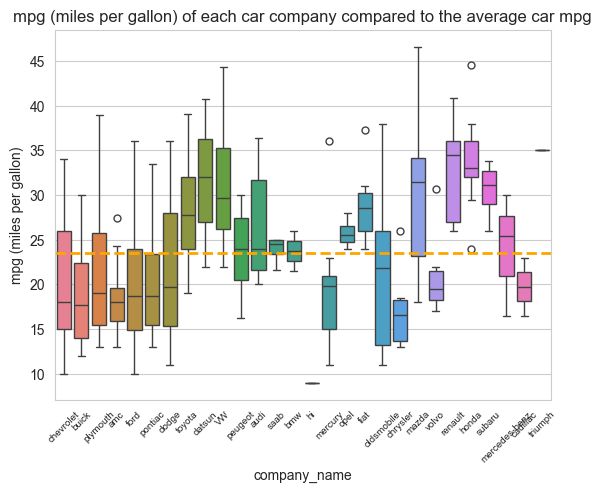

In [134]:
sns.boxplot(x=mpg["company_name"], #the x-axis will only include the species
            y=mpg['mpg'], 
            hue=mpg["company_name"], #`hue` is used to visualise the data of different categories into one graph
            #palette={'usa': "brown", 'japan': "red" , 'europe' :"blue"}, # I am defining the colors of each boxplot
           flierprops={"marker": "o",'markersize': 5} #I am defining the markers color and size
           ).set(title= ('mpg (miles per gallon) of each car company compared to the average car mpg'), ylabel = ('mpg (miles per gallon)')
                ) 
#plt.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xticks(rotation=45,size = 7)
#plt.axis(ymin=0, ymax=1)
plt.axhline(mpg.mpg.mean(),color='orange',linestyle='dashed',linewidth=2)

In [150]:
#mpg['origin' == 'japan']#["company_name"]

#mpg[mpg["origin"].str.contains("japan")]['company_name']
mpg[mpg["origin"].str.contains("USA")]['company_name']
#mpg[mpg["origin"].str.contains("europe")]['company_name']

Series([], Name: company_name, dtype: object)

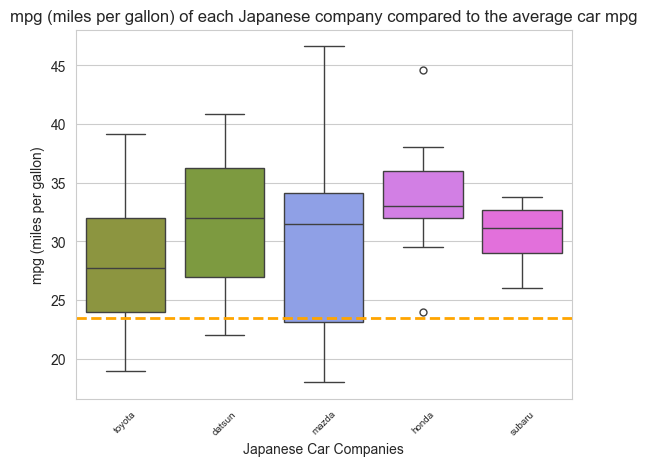

In [147]:
sns.boxplot(x=mpg[mpg["origin"].str.contains("japan")]['company_name'], #the x-axis will only include the species
            y=mpg['mpg'], 
            hue=mpg["company_name"], #`hue` is used to visualise the data of different categories into one graph
            #palette={'usa': "brown", 'japan': "red" , 'europe' :"blue"}, # I am defining the colors of each boxplot
           flierprops={"marker": "o",'markersize': 5} #I am defining the markers color and size
           ).set(title= ('mpg (miles per gallon) of each Japanese company compared to the average car mpg'), 
                 ylabel = ('mpg (miles per gallon)'),
                 xlabel = ('Japanese Car Companies')
                ) 
#plt.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.legend([],[], frameon=False)
plt.xticks(rotation=45,size = 7)
#plt.axis(ymin=0, ymax=1)
plt.axhline(mpg.mpg.mean(),color='orange',linestyle='dashed',linewidth=2)

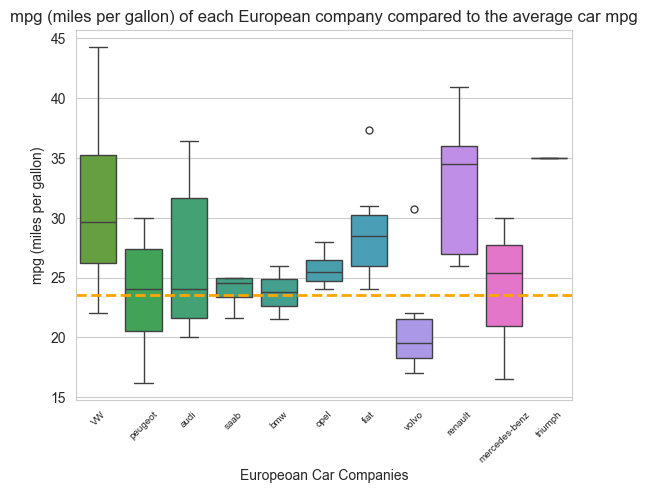

In [151]:
sns.boxplot(x=mpg[mpg["origin"].str.contains("europe")]['company_name'], #the x-axis will only include the species
            y=mpg['mpg'], 
            hue=mpg["company_name"], #`hue` is used to visualise the data of different categories into one graph
            #palette={'usa': "brown", 'japan': "red" , 'europe' :"blue"}, # I am defining the colors of each boxplot
           flierprops={"marker": "o",'markersize': 5} #I am defining the markers color and size
           ).set(title= ('mpg (miles per gallon) of each European company compared to the average car mpg'), 
                 ylabel = ('mpg (miles per gallon)'),
                 xlabel = ('Europeoan Car Companies')
                ) 
#plt.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.legend([],[], frameon=False)
plt.xticks(rotation=45,size = 7)
#plt.axis(ymin=0, ymax=1)
plt.axhline(mpg.mpg.mean(),color='orange',linestyle='dashed',linewidth=2)

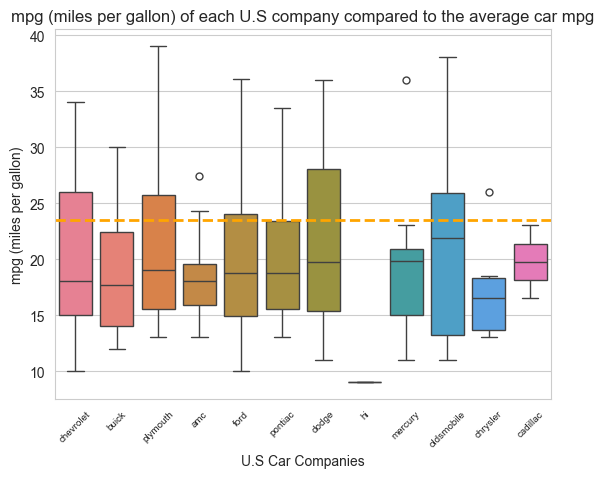

In [152]:
sns.boxplot(x=mpg[mpg["origin"].str.contains("usa")]['company_name'], #the x-axis will only include the species
            y=mpg['mpg'], 
            hue=mpg["company_name"], #`hue` is used to visualise the data of different categories into one graph
            #palette={'usa': "brown", 'japan': "red" , 'europe' :"blue"}, # I am defining the colors of each boxplot
           flierprops={"marker": "o",'markersize': 5} #I am defining the markers color and size
           ).set(title= ('mpg (miles per gallon) of each U.S company compared to the average car mpg'), 
                 ylabel = ('mpg (miles per gallon)'),
                 xlabel = ('U.S Car Companies')
                ) 
#plt.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.legend([],[], frameon=False)
plt.xticks(rotation=45,size = 7)
#plt.axis(ymin=0, ymax=1)
plt.axhline(mpg.mpg.mean(),color='orange',linestyle='dashed',linewidth=2)